# 6. Quiz

### 어느 결혼식장에서 피로연의 식수 인원을 올바르게 예측하지 못하여 버려지는 음식으로 고민이 많다고 합니다. 현재까지 진행된 결혼식에 대한 결혼식 참석과 인원과 그 중에서 식사를 하는 인원의 데이터가 제공될 때, 아래 각 문항에 대한 코드를 작성하시오.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1) QuizData.csv 파일로부터 데이터를 읽어와서 결혼식 참석 인원 (total), 식수 인원 (reception)을 각각의 변수로 저장하시오.

In [3]:
dataset = pd.read_csv('QuizData.csv')
dataset.head()

,total,reception
0,118,62
1,253,148
2,320,201
3,94,80
4,155,92


In [9]:
dataset.shape

(20, 2)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   total      20 non-null     int64
 1   reception  20 non-null     int64
dtypes: int64(2)
memory usage: 448.0 bytes


In [19]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [20]:
print(X[:5])
print(y[:5])

[[118]
 [253]
 [320]
 [ 94]
 [155]]
[ 62 148 201  80  92]


### 2) 전체 데이터를 훈련 세트와 테스트 세트로 분리하시오. 이 때 비율은 75:25로 합니다.
### (단, random_state = 0으로 설정)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [22]:
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (15, 1)
X_test:  (5, 1)
y_train:  (15,)
y_test:  (5,)


### 3) 훈련 세트를 이용하여 단순 선형 회귀 (Simple Linear Regression) 모델을 생성하시오.

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### 4) 데이터 시각화 (훈련 세트) 코드를 작성하시오.

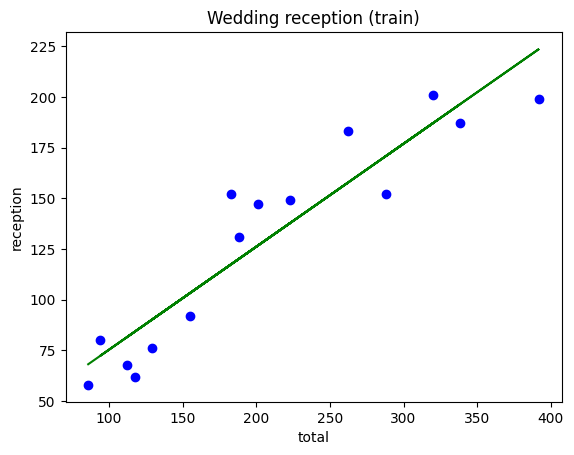

In [24]:
plt.scatter(X_train, y_train, color = 'b')
plt.plot(X_train, lr.predict(X_train), color = 'g')
plt.title('Wedding reception (train)')
plt.xlabel('total')
plt.ylabel('reception')
plt.show()

### 5) 데이터 시각화 (테스트 세트) 코드를 작성하시오.

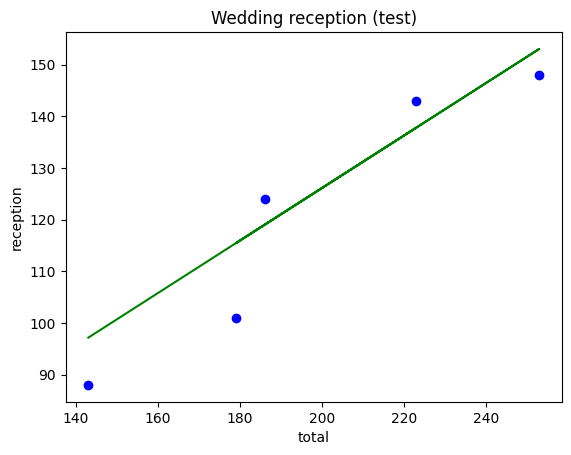

In [26]:
plt.scatter(X_test, y_test, color = 'b')
plt.plot(X_test, lr.predict(X_test), color = 'g')
plt.title('Wedding reception (test)')
plt.xlabel('total')
plt.ylabel('reception')
plt.show()

### 6) 훈련 세트, 테스트 세트에 대해 각각 모델 평가 점수를 구하시오.

In [27]:
# 훈련 세트
lr.score(X_train, y_train)

0.8707088403321211

In [28]:
# 테스트 세트
lr.score(X_test, y_test)

0.8634953212566615

### 7) 결혼식 인원이 300명일 때, 예상되는 식수 인원을 구하시오.

In [32]:
total = 300
print(f'결혼식 참석 인원 {total}명에 대한 예상 식수 인원은 {np.around(lr.predict([[300]])[0]).astype(int)}명 입니다.')

결혼식 참석 인원 300명에 대한 예상 식수 인원은 177명 입니다.
